This notebook looks at the vertical eddy viscosity/diffusivity during a deep water renewal event in late August 2003.

Compares a kw closure with k-eps closure

Both have no wind, rm_avm0 =1e-4, rn_avt0 = 1e-5, no bbl, isoneutral mixing

dwr_kw compared to dwr_isoneutral

In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
import os

from salishsea_tools import (nc_tools,viz_tools)
from salishsea_tools.nowcast import analyze

In [2]:
# Load the data. Path name can be changed to look at different data.  
runs=['dwr_kw','dwr_isoneutral']
base='/data/nsoontie/MEOPAR/SalishSea/results/stratification/'
sals={}; depths={}; avms={}; avds={}; Ws={};depthws={}; Us={}; Vs={}
for run in runs:
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_T.nc'.format(run))
    f = NC.Dataset(path,'r');
    sals[run]=f.variables['vosaline']
    depths[run] = f.variables['deptht'] 
    T_lat = f.variables['nav_lat']
    T_lon = f.variables['nav_lon']

    #Loading eddy viscosity/diffusivity data on the vertical grid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_W.nc'.format(run))
    f = NC.Dataset(path,'r');
    avms[run]=f.variables['ve_eddy_visc']
    avds[run]= f.variables['ve_eddy_diff']
    Ws[run]=f.variables['vovecrtz'][:]
    depthws[run] = f.variables['depthw']

    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_U.nc'.format(run))
    f = NC.Dataset(path,'r');
    Us[run]=f.variables['vozocrtx']


    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_V.nc'.format(run))
    f = NC.Dataset(path,'r');
    Vs[run]=f.variables['vomecrty']


grid = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy=grid.variables['Bathymetry']


# Basic Comparison

Which case has higher eddy viscosity? Higher average? How does it change over time? Where are the max values?


In [3]:

maxes_diff={}; maxes_visc={}; means_diff={}; means_visc={}; inds_diff={}; inds_visc={}

for run in runs:
    maxes_diff[run]=[]; maxes_visc[run]=[]; means_diff[run]=[]; means_visc[run]=[]; inds_diff[run]=[]
    inds_visc[run]=[]
    for t in np.arange(0,sals[run].shape[0]):
        #mask
        mu = avds[run][t,0:,:,:] == 0
        avd_mask = np.ma.array(avds[run][t,::,:,:],mask=mu)
        mu = avms[run][t,0:,:,:] == 0
        avm_mask = np.ma.array(avms[run][t,::,:,:],mask=mu)
        maxes_diff[run].append(np.nanmax(avd_mask))
        ind =np.nanargmax(avd_mask)
        inds_diff[run].append(np.unravel_index(ind, avd_mask.shape))
        maxes_visc[run].append(np.nanmax(avm_mask))
        ind =np.nanargmax(avm_mask)
        inds_visc[run].append(np.unravel_index(ind, avm_mask.shape))
        means_diff[run].append(np.nanmean(avd_mask))
        means_visc[run].append(np.nanmean(avm_mask))

In [4]:
for run in runs:
    print run
    print inds_diff[run]
    print inds_visc[run]



dwr_kw
[(1, 773, 119), (1, 773, 119), (7, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (4, 773, 119), (2, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (2, 773, 119), (2, 773, 119), (3, 773, 119), (3, 773, 119), (3, 773, 119), (4, 773, 119), (3, 773, 119), (2, 773, 119), (2, 773, 119), (2, 773, 119), (2, 773, 119), (2, 773, 119), (3, 773, 119), (3, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119)]
[(1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (2, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (2, 773, 119), (2, 773, 119), (2, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (

Where are the highest vertical eddy coeffcients? Notsmooth changes over time but it looks like it is always in the northern part of the domain

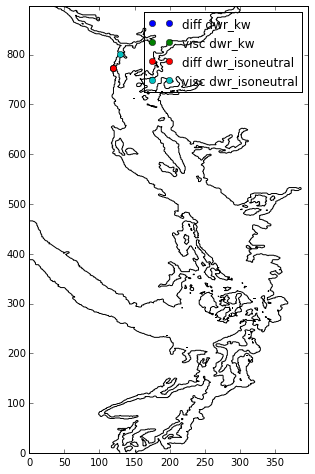

In [5]:
fig,ax=plt.subplots(1,1,figsize=(5,8))
viz_tools.plot_coastline(ax,grid)
for run in runs:
    ax.plot(inds_diff[run][0][2],inds_diff[run][0][1],'o',label='diff ' + run)
    ax.plot(inds_visc[run][0][2],inds_visc[run][0][1],'o',label='visc ' + run)
plt.legend(loc=0)

/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


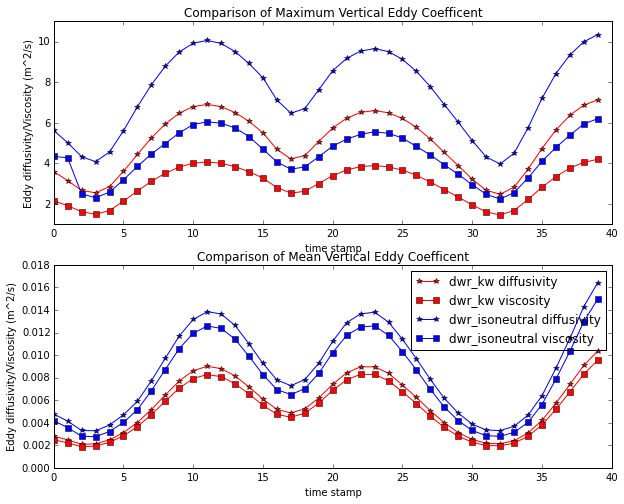

In [6]:
fig,axs=plt.subplots(2,1,figsize=(10,8))
ts=np.arange(0,sals[runs[0]].shape[0])
#maxes
ax=axs[0]
run1=runs[0]
ax.plot(ts,maxes_diff[run1],'*-r',label=run1 +' diffusivity')
ax.plot(ts,maxes_visc[run1],'s-r',label=run1 +' viscosity')
run2=runs[1]
ax.plot(ts,maxes_diff[run2],'*-b',label=run2 +' diffusivity')
ax.plot(ts,maxes_visc[run2],'s-b',label=run2 +' viscosity')
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s)')
ax.set_title('Comparison of Maximum Vertical Eddy Coefficent')
plt.legend(loc=0)

#means
ax=axs[1]

ax.plot(ts,means_diff[run1],'*-r',label=run1 +' diffusivity')
ax.plot(ts,means_visc[run1],'s-r',label=run1+' viscosity')

ax.plot(ts,means_diff[run2],'*-b',label=run2 +' diffusivity')
ax.plot(ts,means_visc[run2],'s-b',label=run2 +' viscosity')
    
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s)')
ax.set_title('Comparison of Mean Vertical Eddy Coefficent')
plt.legend(loc=0)

* Much difference values for maxmimm/mean eddy coefficients. Lower with kw means less mixing.

# Thalweg

Plotting salinity and eddy viscosity/diffusivity along thalweg over time. Daily average outputs over 10 days.

In [7]:
lines = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)
T_lon = T_lon[:]
T_lat=T_lat[:]

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);
vs=np.arange(34,27.5,-0.5);
XX_T={}; ZZ_T={}; XX_W={}; ZZ_W={} 
for run in runs:
    XX_T[run],ZZ_T[run] = np.meshgrid(ds,-depths[run][:])
    XX_W[run],ZZ_W[run] = np.meshgrid(ds,-depthws[run][:])

Salinity difference along thalweg over time.

dwr_kw - dwr_isoneutral


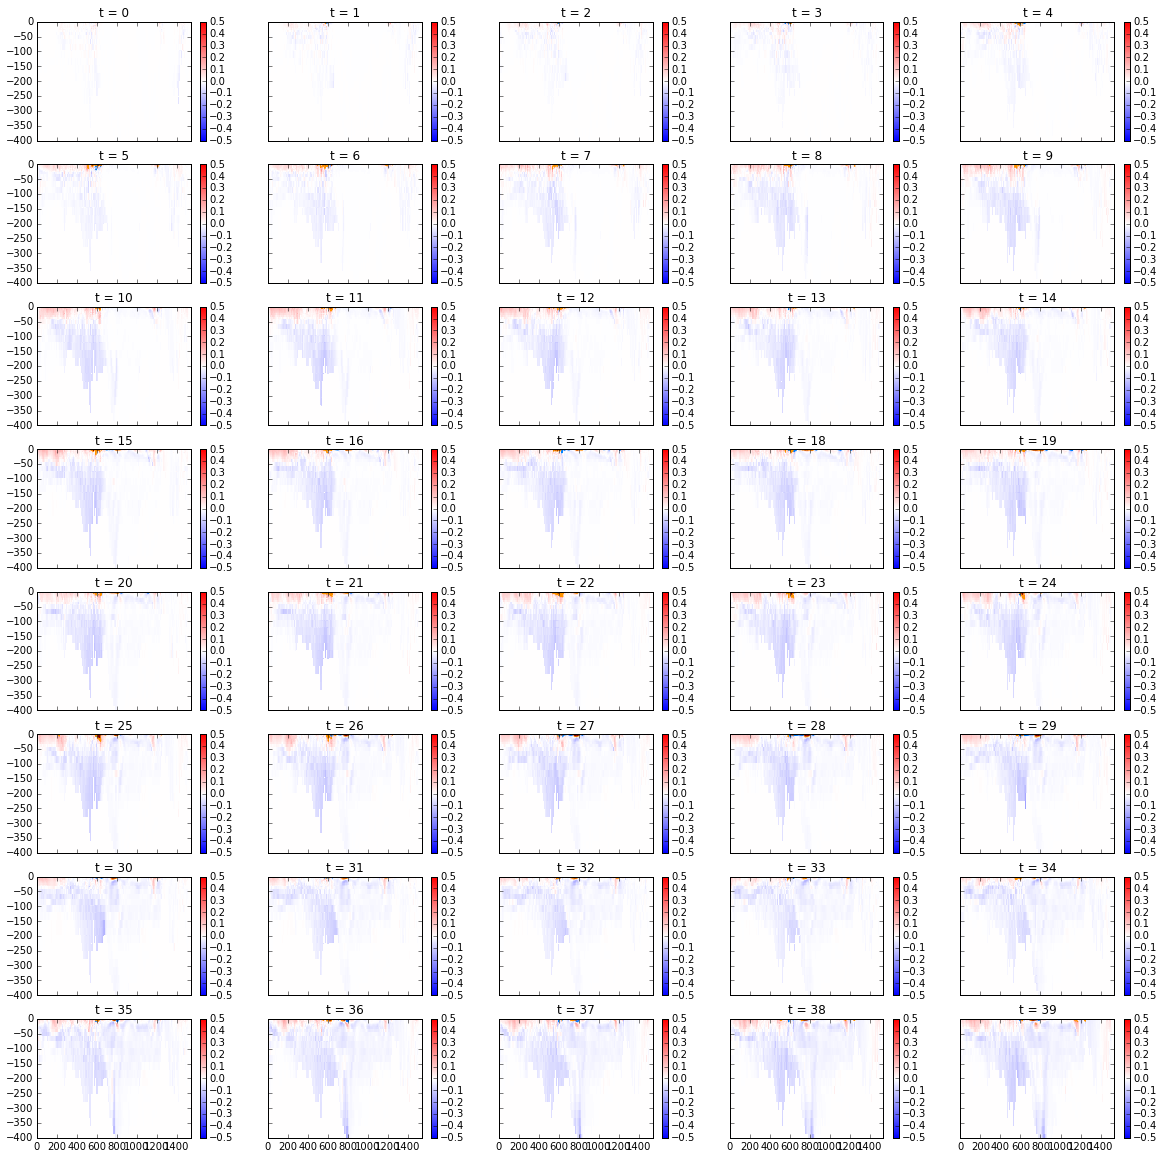

In [8]:
fig,axs=plt.subplots(8,5,figsize=(20,20),sharex=True,sharey=True)
smin=-.5;smax=.5
diff = sals[run1][:]-sals[run2][:]
for t,ax in zip(np.arange(40),axs.flat):
    mesh=ax.pcolormesh(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,vmin=smin,vmax=smax,cmap='bwr')
    CS=ax.contour(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,[-.4,-.2,0.2,.4])
    plt.colorbar(mesh, ax=ax)
    ax.clabel(CS,fontsize=9, inline=1)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_ylim([-400,0])
    ax.set_title('t = ' +str(t))
    
print run1 + ' - ' + run2

* kw has fresher SJdF deep and Haro Strait deep, SoG intermediate
* kw has saltier SJdF surface
* Really? This doesnt seem to match with smaller eddy coefficients...
* DWR in kw looks fresher.

# Surface

dwr_kw - dwr_isoneutral


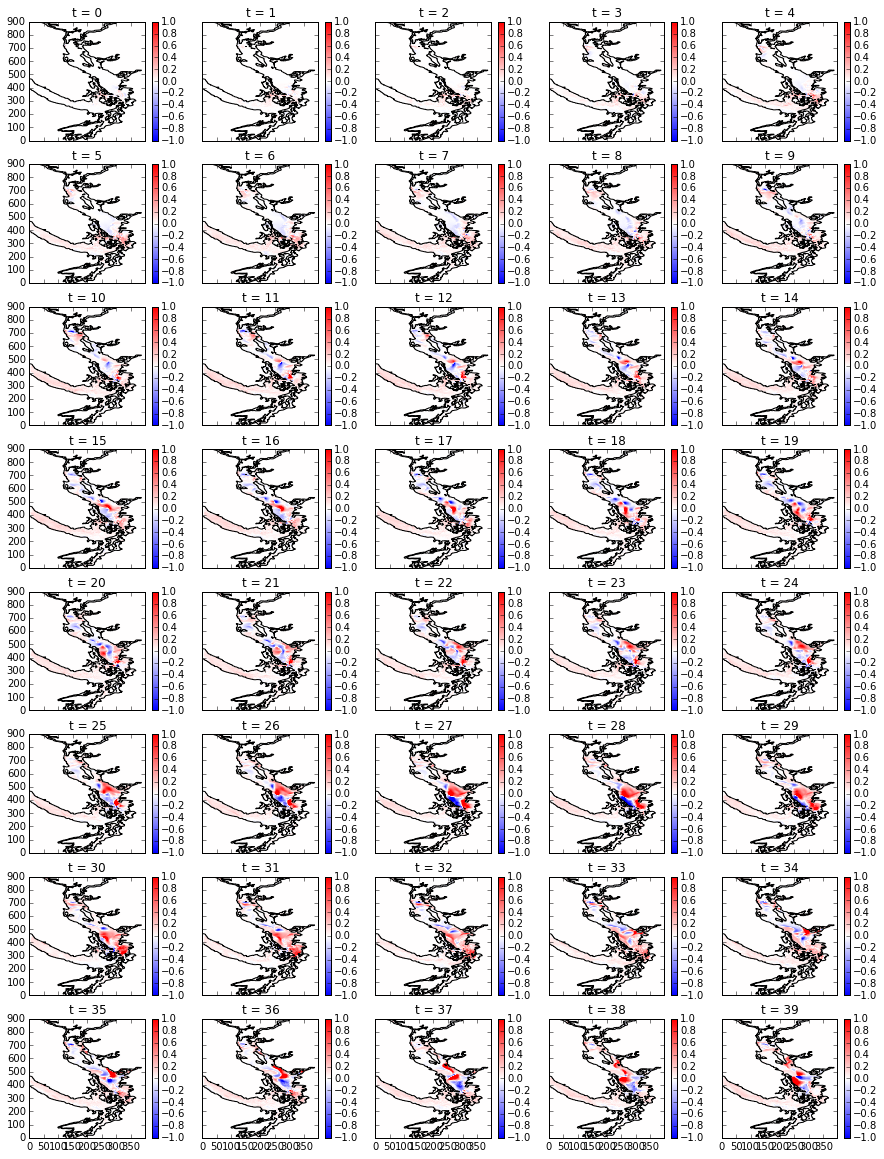

In [9]:
fig,axs=plt.subplots(8,5,figsize=(15,20),sharex=True,sharey=True)
smin=-1;smax=1; dep=0

for t,ax in zip(np.arange(40),axs.flat):
    salP=sals[run1][t,dep,:,:];
    salP1=salP
    salP=sals[run2][t,dep,:,:];
    mesh=ax.pcolormesh(salP1-salP,vmin=smin,vmax=smax,cmap='bwr')
    plt.colorbar(mesh, ax=ax)
    viz_tools.plot_coastline(ax,grid)
    
    ax.set_title('t = ' +str(t))
    
print run1 + ' - ' + run2

* differences in surface SoG are variable. 
* SJdF surface is consistently saltier in kw. 

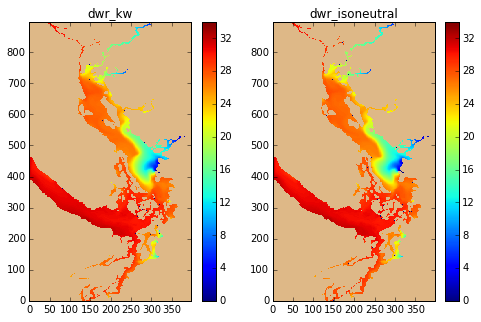

In [10]:
fig,axs=plt.subplots(1,2,figsize=(8,5))
smin=0;smax=34; dep=0; t=39
mesh=axs[0].pcolormesh(sals[run1][t,dep,:,:],vmin=smin,vmax=smax,cmap='jet')
cbar=plt.colorbar(mesh,ax=axs[0])
viz_tools.plot_land_mask(axs[0],grid,color='burlywood')
axs[0].set_title(run1)
mesh=axs[1].pcolormesh(sals[run2][t,dep,:,:],vmin=smin,vmax=smax,cmap='jet')
cbar=plt.colorbar(mesh,ax=axs[1])
viz_tools.plot_land_mask(axs[1],grid,color='burlywood')
axs[1].set_title(run2)


No winds

Preparing for quivers

In [11]:
def quiver_salinity(t,dep,imin=1,imax=396,jmin=1,jmax=896,st=5):
    "compare rivers and salinity at t, dep in box. st is quiver arrow interval"
    fig,axs = plt.subplots(1,2,figsize=(12,5))
    x=np.arange(imin,imax)
    y=np.arange(jmin,jmax)
    for key, ax in zip(runs,axs):
        #trununcate U/V and unstagger
        U= Us[key][t,dep,jmin-1:jmax,imin-1:imax]
        V =Vs[key][t,dep,jmin-1:jmax,imin-1:imax]
        lon=T_lon[jmin:jmax,imin:imax]
        lat=T_lat[jmin:jmax,imin:imax]
        S=sals[key][t,dep,jmin:jmax,imin:imax]
        #masking
        U = np.ma.masked_values(U,0)
        V = np.ma.masked_values(V,0)
        #unstagger
        u,v = viz_tools.unstagger(U,V)
        #rotate
        theta = np.pi*29/180
        uE = u*np.cos(theta) - v*np.sin(theta)
        vN = u*np.sin(theta) +v*np.cos(theta)
        #mesh
        mesh=ax.pcolormesh(lon,lat,S,cmap='spectral')
        viz_tools.plot_land_mask(ax,grid,coords='map',color='burlywood')
        #quivers
        quiver = ax.quiver(lon[::st,::st],lat[::st,::st],uE[::st,::st], vN[::st,::st],
                       pivot='mid', scale=4.5, color='white',width=0.005
                       )
        ax.quiverkey(quiver,-123.7,48.5, 1,'1 m/s',
                 coordinates='data', color='white', labelcolor='white')

        ax.set_xlim([-124,-122.8])
        ax.set_ylim([48.6,49.5])
    return fig

Day 40

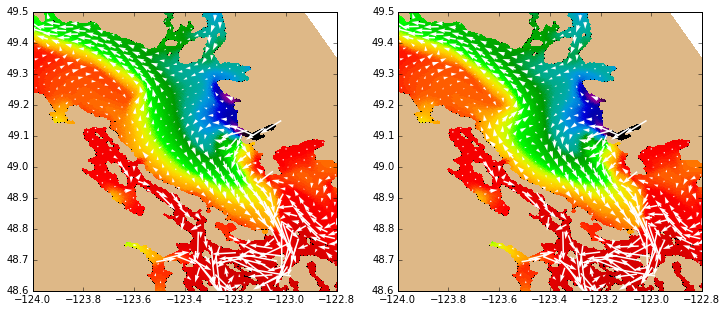

In [12]:
day=39
dep=0
fig=quiver_salinity(day,dep,st=6)

* Surface currents and salinity look really similar. Tgere are some small differences

In [13]:
def average_thalweg(depth, index1,index2, var):
    #Averages the given variable along the thalweg at a depth and for indices between index1 and index2
    
    var_thal = var[depth,lines[:,0],lines[:,1]]
    #mask
    mu = var_thal==0
    var_thal=np.ma.array(var_thal,mask=mu)
    
    var_average=np.nanmean(var_thal[index1:index2])
    
    return var_average

dwr_kw - dwr_isoneutral


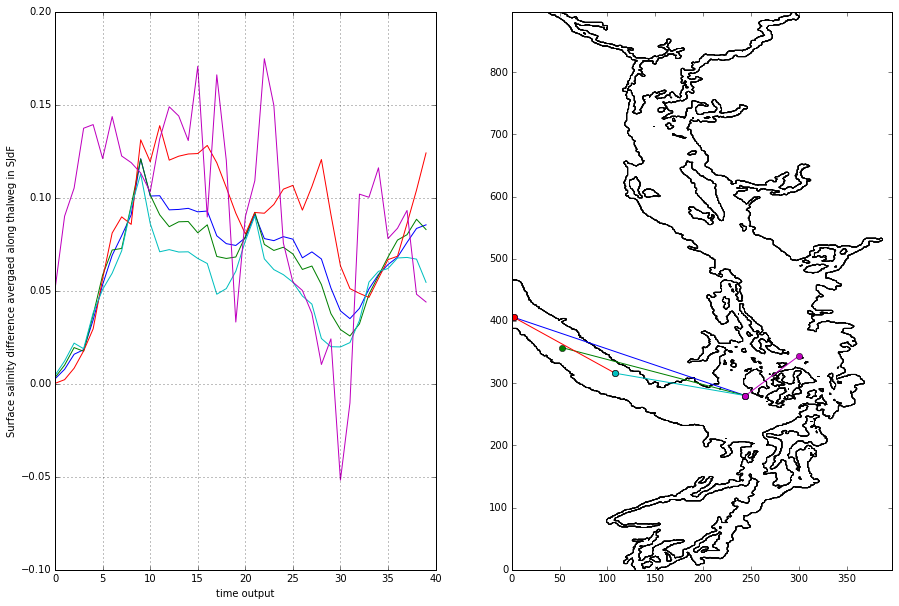

In [14]:
#plot now
t1=0;t2=40;
fig,axs = plt.subplots(1,2,figsize=(15,10))
diffs = sals[run1][t1:t2,:,:,:]-sals[run2][t1:t2,:,:,:]
tm=np.arange(t1,t2)
inds1 = [0,100,0,200,450]; inds2= [450,450,200,450,600]
dep=0; 
for ind1,ind2 in zip(inds1,inds2):
    averages = []
    for n in range(diffs.shape[0]):
        averages.append(average_thalweg(dep,ind1,ind2,diffs[n,:,:,:]))
    ax=axs[0]
    ax.plot(tm,averages)
    ax.set_xlabel('time output')
    ax.set_ylabel('Surface salinity difference avergaed along thalweg in SJdF')

    ax=axs[1]
    viz_tools.plot_coastline(ax,grid)
    ax.plot([lines[ind1,1],lines[ind2,1]],[lines[ind1,0],lines[ind2,0]],'o-')
axs[0].grid()
    
print run1 + ' - ' + run2

Left: dwr_kw
Right: dwr_isoneutral


/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


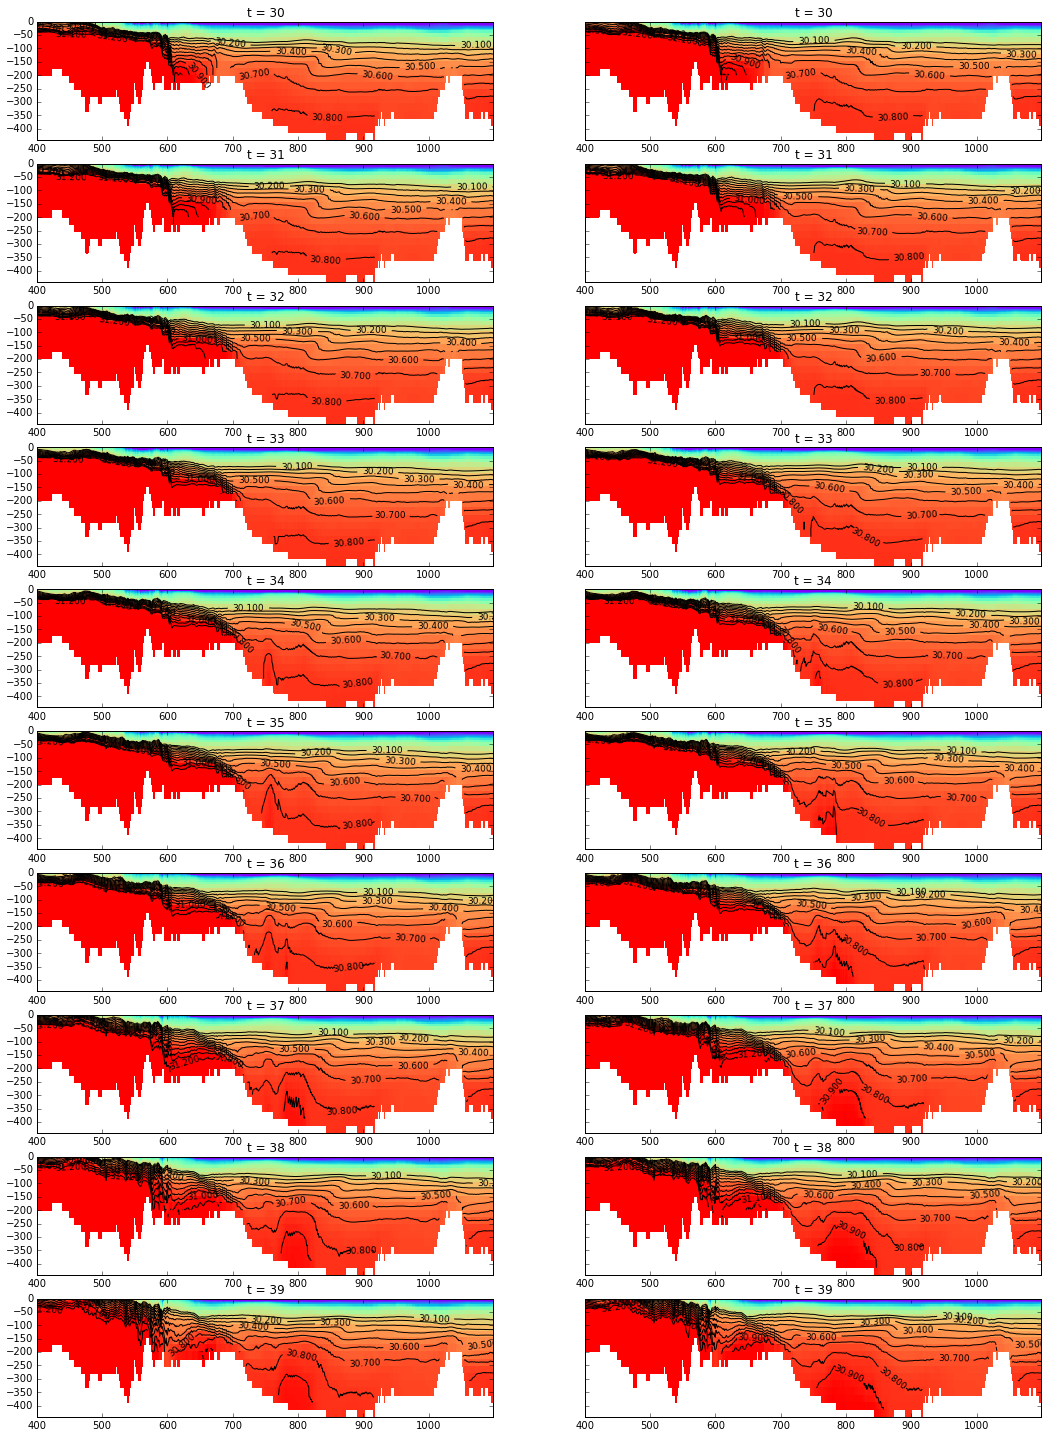

In [15]:
smin=28; smax=31
emin=-4; emax=2

(fig,axs)=plt.subplots(10,2,figsize=(18,25),sharey=True)
ts=np.arange(30,40,1)
vs=np.arange(31.2,30,-0.1);

r1=400; r2=1100;

for t,ax1,ax2 in zip(ts,axs[:,0],axs[:,1]):
    #salinity
    run=runs[0]
    salP=sals[run][:]
    salP=salP[t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax1.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax1.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vs, colors='black')
    ax1.clabel(CS,fontsize=9, inline=1)
    ax1.set_title('t = ' +str(t))
    
    run=runs[1]
    salP=sals[run][:]
    salP=salP[t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax2.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax2.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vs, colors='black')
    ax2.clabel(CS,fontsize=9, inline=1)
    ax2.set_title('t = ' +str(t))
print 'Left:', runs[0]
print 'Right:', runs[1]

* DWR less salty with kw

# Average salinity over a volume

In this case, averaging will take into account that the grid spacing changes vertically. But I am assuming that horizontal grid boxes are equal area.

In [16]:
def average_over_box(varis,depths,t,imin,imax,jmin,jmax,dmin,dmax):
    """Average field stored in var over a box at a time t. """
    
    var_av={}
    #iteraring over variables in varis
    for key, var in varis.iteritems():
        #subdomain
        sub = var[t,dmin:dmax+1,jmin:jmax+1,imin:imax+1]
        sub_dep = depths[key][dmin:dmax+1]
        #mask
        sub=np.ma.masked_values(sub,0)
        #averaing horizontally. Assuming horizontal grid boxes are equal area
        sub = np.nanmean(sub,axis=2)
        sub = np.nanmean(sub,axis=1)
        var_av[key]=analyze.depth_average(sub,sub_dep,depth_axis=0)
    return var_av

In [17]:
def compare_volume_average(imin,imax,jmin,jmax,dmin,dmax):
    """"time series of volume averages comparison"""
    #time series of average
    keys=sals.keys()
    sals_av = {keys[0]:[],keys[1]:[]}
    for t in np.arange(sals[keys[1]].shape[0]):
        avg=average_over_box(sals,depths,t,imin,imax,jmin,jmax,dmin,dmax)
        for run, out in avg.iteritems():
            sals_av[run].append(out)
    
    #plotting
    fig,axs=plt.subplots(1,2,figsize=(10,5))
    #map
    ax=axs[0]
    viz_tools.plot_coastline(ax,grid)
    ax.plot([imin,imax],[jmin,jmin],'r-')
    ax.plot([imin,imax],[jmax,jmax],'r-')
    ax.plot([imin,imin],[jmin,jmax],'r-')
    ax.plot([imax,imax],[jmin,jmax],'r-')
    
    #averages
    ax=axs[1]
    for key, sal_plot in sals_av.iteritems():
        ax.plot(sal_plot,label=key)
        ax.legend(loc=0)
        ax.set_xlabel('output time')
        ax.set_ylabel('Average Salinity [psu]')
    ax.set_title('Depth range {0:.3} -{1:.3} m'.format(depths[key][dmin], depths[key][dmax]))
    ax.grid()
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    diff = np.array(sals_av[keys[1]])-np.array(sals_av[keys[0]])
    print 'Difference between {} and {} in [psu]'.format(keys[1], keys[0])
    print 'Max diff: {0:.2}'.format(np.max(diff))
    print 'Min diff: {0:.2}'.format(np.min(diff))
    print 'Mean diff: {0:.2}'.format(np.mean(diff))
    return fig


## Juan de Fuca - surface, depth, whole water column

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: 0.046
Min diff: 0.00074
Mean diff: 0.027


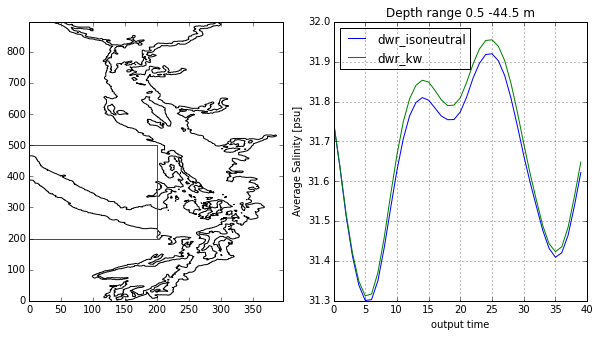

In [18]:
fig = compare_volume_average(0,200,200,500,0,23)

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: -8.2e-05
Min diff: -0.0091
Mean diff: -0.0055


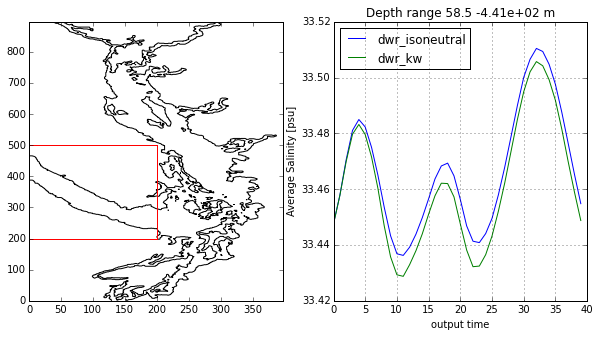

In [19]:
fig = compare_volume_average(0,200,200,500,24,39)

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: 0.002
Min diff: -0.0042
Mean diff: -0.00091


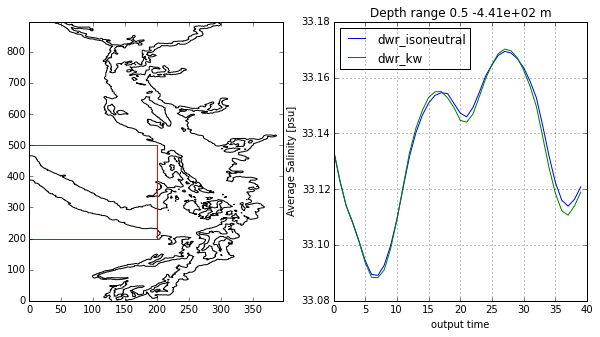

In [20]:
fig = compare_volume_average(0,200,200,500,0,39)

* Saliter SoG surface
* Fresher SoF deep

## Gulf Islands - surface, depth, whole water column

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: 0.022
Min diff: -0.017
Mean diff: 0.0023


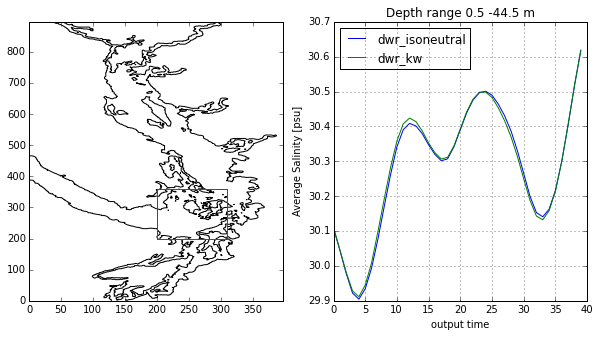

In [21]:
fig = compare_volume_average(200,310,200,360,0,23)

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: -0.0029
Min diff: -0.068
Mean diff: -0.047


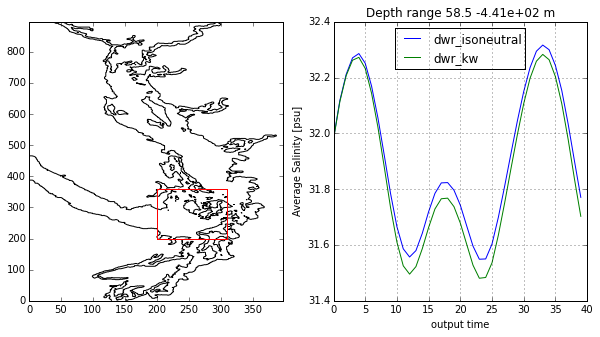

In [22]:
fig = compare_volume_average(200,310,200,360,24,39)

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: -0.0023
Min diff: -0.059
Mean diff: -0.04


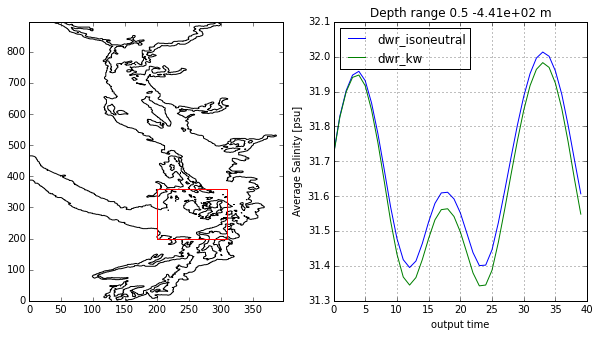

In [23]:
fig = compare_volume_average(200,310,200,360,0,39)

* Fresher at depth in the Gulf Islands

## Strait of Georgia - surface(0-5), intermediate (25-100), depth (100-400), whole water column

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: 0.2
Min diff: -0.026
Mean diff: 0.067


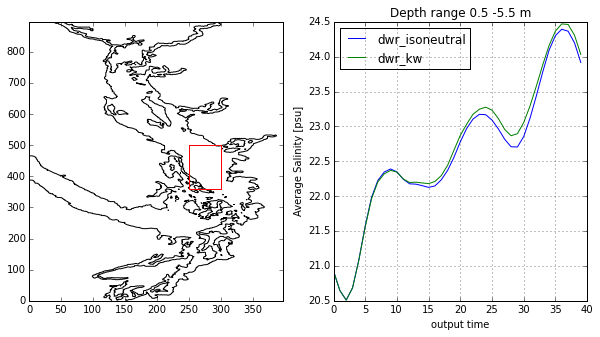

In [24]:
fig = compare_volume_average(250,300,360,500,0,5)

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: -0.00015
Min diff: -0.037
Mean diff: -0.019


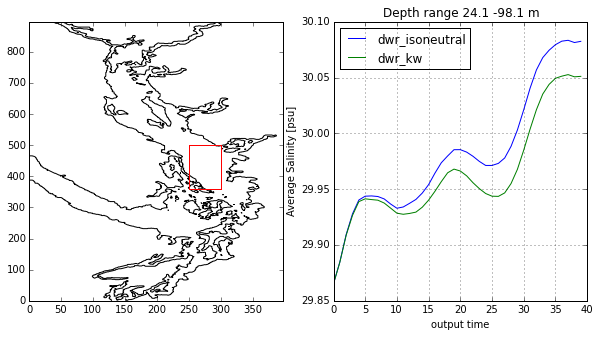

In [25]:
fig = compare_volume_average(250,300,360,500,20,26)

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: -7.4e-05
Min diff: -0.039
Mean diff: -0.014


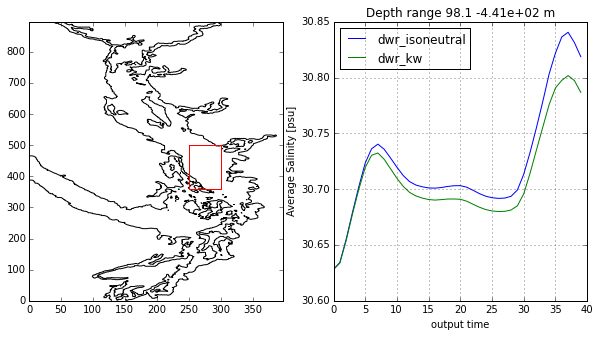

In [26]:
fig = compare_volume_average(250,300,360,500,26,39)

Difference between dwr_kw and dwr_isoneutral in [psu]
Max diff: -9.8e-05
Min diff: -0.034
Mean diff: -0.013


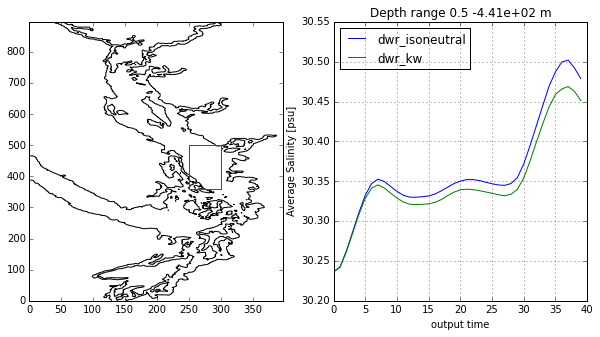

In [27]:
fig = compare_volume_average(250,300,360,500,0,39)

* Saltier surface SoG
* Fresher intermediate and deep SpG

##Eddy Coefficients

viscosity
Left:  dwr_kw
Right:  dwr_isoneutral


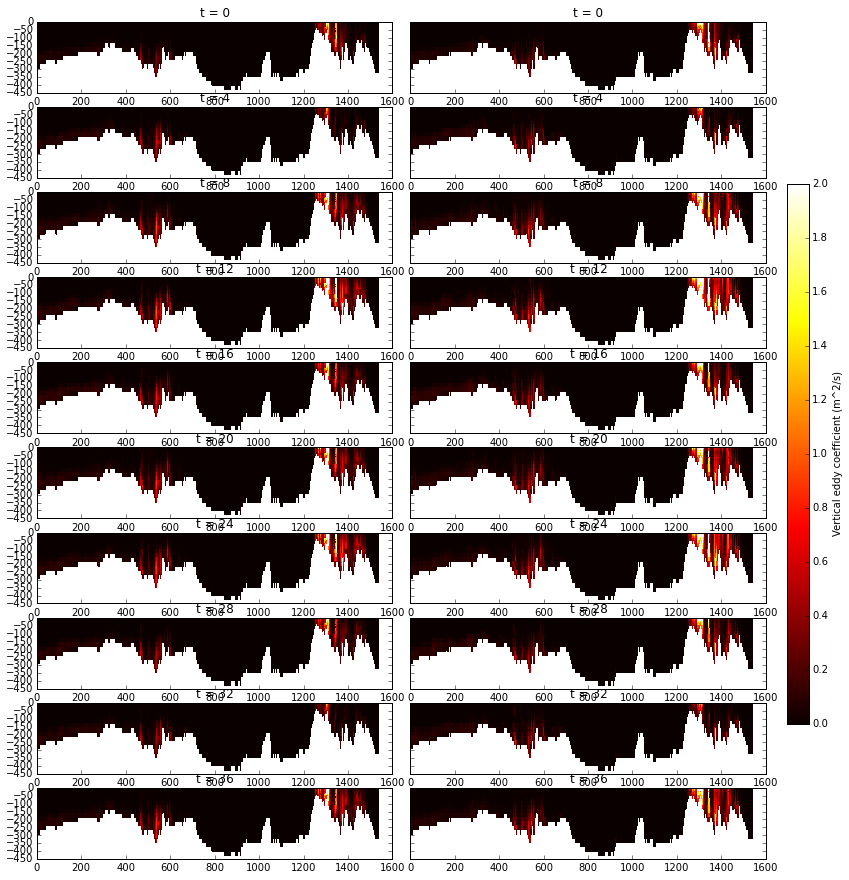

In [28]:
smin=28; smax=34
emin=0; emax=2

(fig,axs)=plt.subplots(10,2,figsize=(15,15),sharey=True)
ts=np.arange(0,40,4)

for i, run in enumerate(runs):
    for t, axV, in zip(ts,axs[:,i]):
        #viscosity
        avmP=avms[run][:];
        avmP=np.ma.masked_values(avmP[t,:,lines[:,0],lines[:,1]],0);
        mesh=axV.pcolormesh(XX_W[run],ZZ_W[run],avmP.T,vmin=emin, vmax=emax,cmap='hot')
        axV.set_title('t = ' +str(t))
    
    
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.02, 0.5])
cbar=fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Vertical eddy coefficient (m^2/s)')

print 'viscosity'
print 'Left: ', runs[0]
print 'Right: ', runs[1]

This is hard to make out any major differences in the viscosity.

diffusivity
Left:  dwr_kw
Right:  dwr_isoneutral


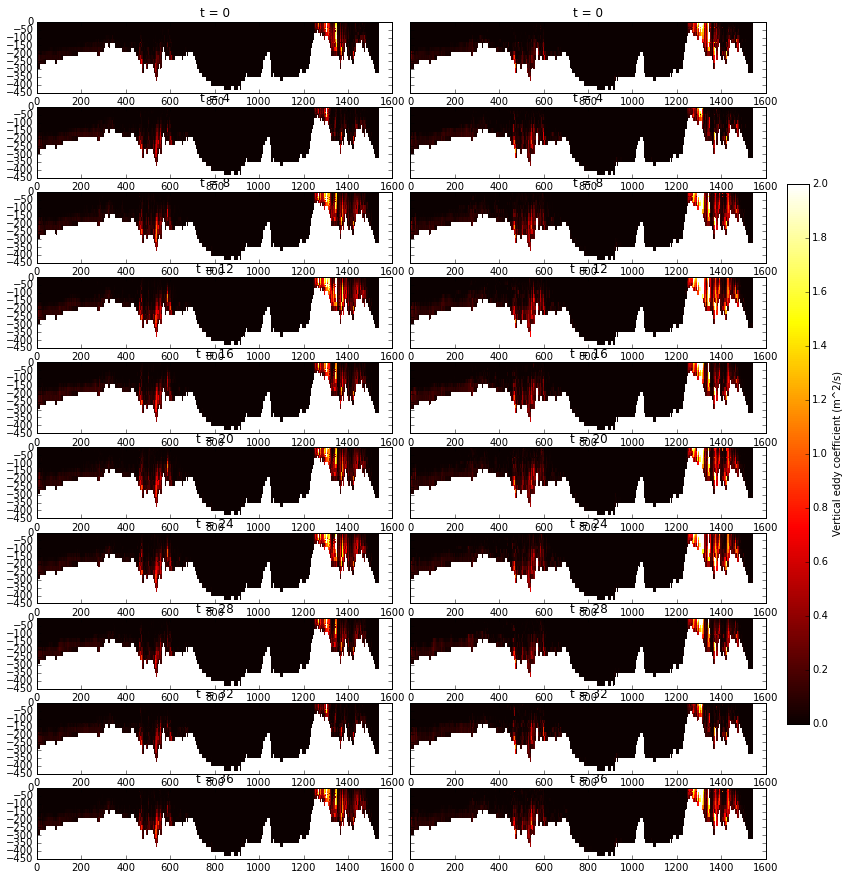

In [29]:
smin=28; smax=34
emin=0; emax=2

(fig,axs)=plt.subplots(10,2,figsize=(15,15),sharey=True)
ts=np.arange(0,40,4)

for i, run in enumerate(runs):
    for t, axD, in zip(ts,axs[:,i]):
        #diffusivity
        avdP=avds[run][:];
        avdP=np.ma.masked_values(avdP[t,:,lines[:,0],lines[:,1]],0);
        mesh=axD.pcolormesh(XX_W[run],ZZ_W[run],avdP.T,vmin=emin, vmax=emax,cmap='hot')
        axD.set_title('t = ' +str(t))
    
    
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.02, 0.5])
cbar=fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Vertical eddy coefficient (m^2/s)')

print 'diffusivity'
print 'Left: ', runs[0]
print 'Right: ', runs[1]

#Velocity

Left:  dwr_kw
Right:  dwr_isoneutral


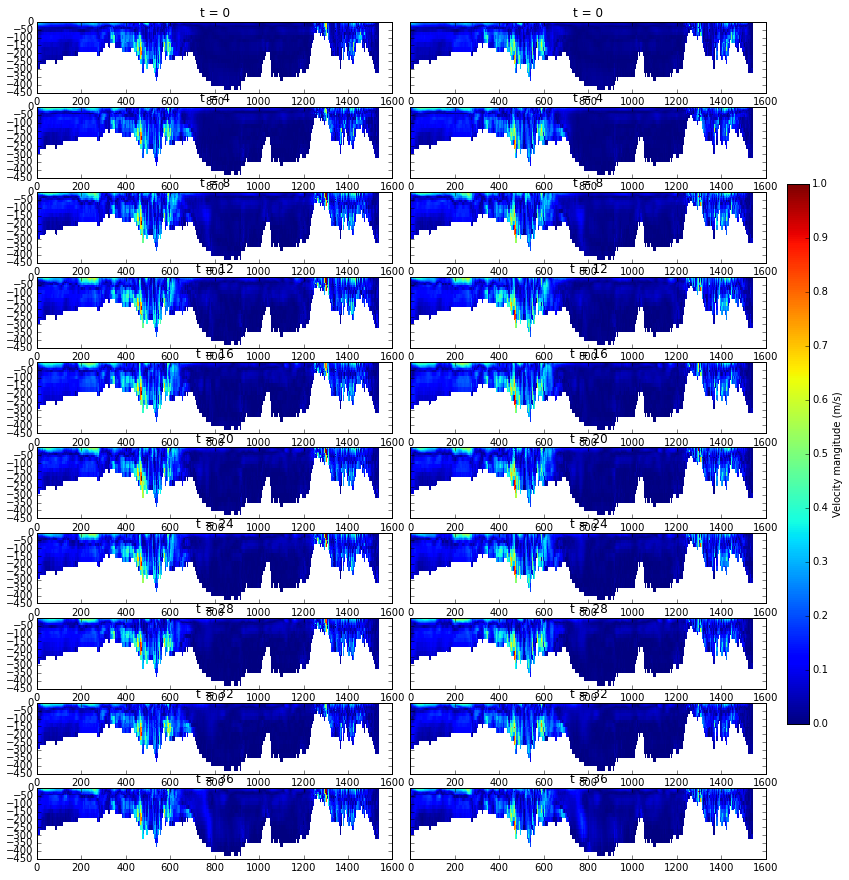

In [30]:
smin=28; smax=34
emin=0; emax=1

(fig,axs)=plt.subplots(10,2,figsize=(15,15),sharey=True)
ts=np.arange(0,40,4)

for i, run in enumerate(runs):
    #viscosity
    vel=np.sqrt(Us[run][:]**2 + Vs[run][:]**2);
    for t, ax, in zip(ts,axs[:,i]):

        velP=np.ma.masked_values(vel[t,:,lines[:,0],lines[:,1]],0);
        mesh=ax.pcolormesh(XX_W[run],ZZ_W[run],velP.T,vmin=emin, vmax=emax,cmap='jet')
        ax.set_title('t = ' +str(t))
    
    
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.02, 0.5])
cbar=fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Velocity mangitude (m/s)')

print 'Left: ', runs[0]
print 'Right: ', runs[1]

#Summary

This is bizarre. The eddy coefficients in the kw case are on average smaller, yet there is more mixing. It reminds me of the modifed resoultion in 2D. 

#Next

Read more about the difference between  k-eps and k-omega. My understanding is that the definition of the turbulent length scale is that main difference. 